In [5]:
from tools import *
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit


In [6]:
mpt = mpt_data(path = r'P:\Chemistry\Data\VMP3\Kyler\DOE\DE_140\30C\\', data = ['DE_140_1_30.mpt'])
len(mpt.df[0])

121

In [7]:
mpt.df[0].head()

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,(Q-Qo)/mA.h,Analog IN 1/V,Y_re,Y_im,Y_mag,Y_phase,dq/mA.h,Unnamed: 21,w
0,1000018.60,97.88530,190.32474,214.02112,-62.782936,1.747493,-0.142069,-0.000395,0.000836,0.000661,1.0,11,0.001157,0.000005,-1.111978e-07,0.000102,0.002137,0.004155,0.004672,62.782936,-1.111978e-07,NaN,6.283302e+06
1,891246.69,110.87362,199.45807,228.20271,-60.931442,2.343473,-0.141540,-0.000460,0.000895,0.000684,1.0,11,0.002162,0.000009,-1.800970e-07,0.000182,0.002129,0.003830,0.004382,60.931442,-6.889922e-08,NaN,5.599868e+06
2,794332.69,124.91974,213.65135,247.49109,-59.685616,2.938475,-0.141079,-0.000511,0.000938,0.000699,1.0,11,0.002904,0.000012,-2.672192e-07,-0.000058,0.002039,0.003488,0.004041,59.685616,-8.712221e-08,NaN,4.990939e+06
3,707949.81,139.60193,228.97610,268.17673,-58.630215,3.533476,-0.140653,-0.000464,0.000982,0.000716,1.0,11,0.002772,0.000010,-4.374788e-07,-0.000219,0.001941,0.003184,0.003729,58.630215,-1.702595e-07,NaN,4.448180e+06
4,630956.81,154.79004,246.91570,291.42291,-57.916637,4.129490,-0.140246,-0.000516,0.001022,0.000733,1.0,11,0.001161,0.000004,-6.323750e-07,-0.000058,0.001823,0.002907,0.003431,57.916637,-1.948962e-07,NaN,3.964419e+06


0.0002641114043681114

In [78]:
self = mpt
Rs_guess = -1.56
R1_guess = 1612
n1_guess = .709
q1_guess = 74.4e-9
R2_guess = 1385
n2_guess = 0.6225
q2_guess = 2.486e-6
Q3_guess = 2.7**-6
n3_guess = 0.905

#74.4e-9 = (1/(1612*(2*np.pi*x)**.709))
#print(Rs_guess,R1_guess,R2_guess)

params = Parameters()
params.add('Rs', value=Rs_guess, min=Rs_guess*.1, max=Rs_guess*10)

params.add('R1', value=R1_guess, min=R1_guess*.1, max=R1_guess*10)
params.add('n1', value=n1_guess, min=0, max=1)
#params.add('fs1', value=fs1_guess, min=10**-2, max=10**10)
params.add('Q1', value=q1_guess, min=0, max=.2)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.01, max=1)
#params.add('fs2', value=fs2_guess, min=fs2_guess**.1, max=10**10)
params.add('Q2', value=q2_guess, min=0, max=.4)

params.add('Q', value=Q3_guess, min=0, max=.5)
params.add('n', value=n3_guess, min=.01, max=1)

self.mpt_fit(params, circuit = 'R-RQ-RQ-Q', maxfev = 10000000)

In [79]:
mpt.low_error

6466.066252255021

No handles with labels found to put in legend.


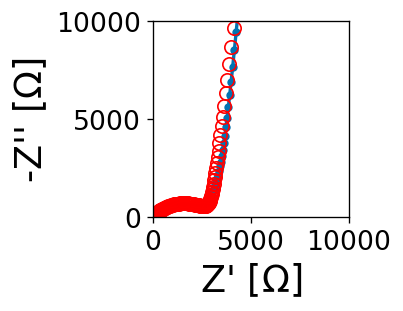

In [80]:
mpt.mpt_plot(fitting = 'on', x_window = [0,10000], y_window = [0,10000])

In [5]:
mpt.low_error

29045030.74559353

No handles with labels found to put in legend.


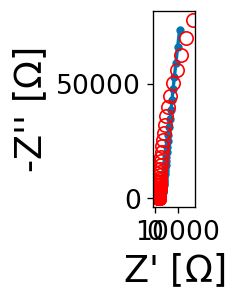

In [6]:
mpt.mpt_plot(fitting = 'on')

In [3]:
mpt.guesser(circuit = 'R-RQ-Q')

,file,fit_Rs,fit_R1,fit_n1,fit_fs1,fit_Q1,fit_Q,fit_n2
0,DE_104_1_30_trimmed.mpt,181.314956,6597.988141,0.749495,31151.715589,1.638755e-08,4.055879e-07,0.730068


No handles with labels found to put in legend.


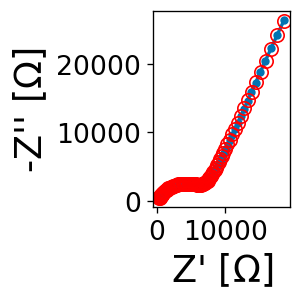

In [4]:
mpt.mpt_plot(fitting = 'on')

In [25]:
mpt.df_raw.head()

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,(Q-Qo)/mA.h,Analog IN 1/V,Y_re,Y_im,Y_mag,Y_phase,dq/mA.h,Unnamed: 21,w
0,1000018.60,328.734100,454.916410,561.262020,-54.147171,1.607492,-0.000910,0.000019,0.000350,0.000230,1.0,12,0.000628,0.000001,-4.540541e-09,0.000425,0.001044,0.001444,0.001782,54.147171,-4.540541e-09,NaN,6.283302e+06
1,891246.69,-4.140771,13.204187,13.838228,-107.411180,2.622600,-0.001409,-0.012680,0.013524,0.012313,1.0,9,0.000059,0.000004,-1.749967e-06,0.001066,-0.021623,0.068953,0.072264,107.411180,-1.745426e-06,NaN,5.599868e+06
2,794332.69,390.277950,523.672730,653.107970,-53.303917,4.101484,-0.001784,0.000011,0.000383,0.000246,1.0,12,0.001122,0.000002,-3.754701e-06,0.000585,0.000915,0.001228,0.001531,53.303917,-2.004734e-06,NaN,4.990939e+06
3,707949.81,417.907010,565.725160,703.342900,-53.546337,4.696477,-0.001941,0.000016,0.000397,0.000257,1.0,12,0.002918,0.000004,-3.727839e-06,0.000666,0.000845,0.001144,0.001422,53.546337,2.686166e-08,NaN,4.448180e+06
4,630956.81,449.914950,618.398680,764.748600,-53.962299,5.292477,-0.002067,0.000007,0.000408,0.000267,1.0,12,0.005477,0.000007,-3.718076e-06,0.000746,0.000769,0.001057,0.001308,53.962299,9.763226e-09,NaN,3.964419e+06
